In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [70]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [4]:
data = pd.read_csv('/content/drive/MyDrive/데이터톤/데이터/2324전처리.csv')
data

,id,방문횟수,여행형태,방한목적,고려한_관광활동_1,고려한_관광활동_2,고려한_관광활동_3,고려한_인프라_1,고려한_인프라_2,고려한_인프라_3,...,항목별만족도_trad_culture,항목별만족도_전시관람,항목별만족도_kpop_drama,항목별만족도_performance,항목별만족도_festival,항목별만족도_entertainment,항목별만족도_recreation,항목별만족도_immigration,항목별만족도_language,항목별만족도_safety
0,6,4,1,1,1.0,7.0,2.0,6.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,4,1,2,3.0,13.0,2.0,3.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,2,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,3,1,2,2.0,1.0,4.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,19273,2,1,1,3.0,2.0,1.0,5.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
32408,19274,2,1,1,12.0,3.0,1.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0
32409,19275,1,1,1,13.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
32410,19277,2,1,1,3.0,2.0,1.0,1.0,5.0,7.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0


In [5]:
for col in data.columns:
    print(col)

id
방문횟수
여행형태
방한목적
고려한_관광활동_1
고려한_관광활동_2
고려한_관광활동_3
고려한_인프라_1
고려한_인프라_2
고려한_인프라_3
참여_식도락관광
참여_쇼핑
참여_자연경관감상
참여_역사유적지방문
참여_전통문화체험
참여_박물관전시관관람
참여_한류스타관련
참여_공연관람
참여_지역축제
참여_유흥
참여_오락
참여_뷰티미용관광
참여_치료건강검진
참여_스포츠관람
참여_스포츠레포츠참가
참여_국제회의
참여_비즈니스
참여_연수교육연구
참여_기타
만족한활동_1
만족한활동_2
만족한활동_3
방문지역_서울
방문지역_경기
방문지역_인천
방문지역_강원
방문지역_대전
방문지역_충북
방문지역_충남
방문지역_세종
방문지역_경북
방문지역_경남
방문지역_대구
방문지역_울산
방문지역_부산
방문지역_광주
방문지역_전북
방문지역_전남
방문지역_제주
총체재기간(코드형)
총체재기간
1인지출경비_영향치결측
1인지출경비_상하위1%대체
1인1일지출경비_영향치_61일이상결측
1인1일지출경비_상하위1%대체
1인1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비
형태별_1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비_항공제외대체결측
항목별지출경비_쇼핑
항목별지출경비_치료
항목별지출경비_미용
항목별지출경비_음식점
항목별지출경비_식음료
항목별지출경비숙박비
항목별지출경비_문화서비스
전반적만족도
항목별만족도_식도락
항목별만족도_쇼핑
항목별만족도_자연경관감상
항목별만족도_뷰티미용관광
항목별만족도_치료건강검진
항목별만족도_스포츠관람
항목별만족도_스포츠레포츠참가
항목별만족도_여행경비
항목별만족도_숙박시설
재방문의사
타인추천의향
월별
분기별
국가별
성별
연령별
방한목적별
방한횟수별
여행형태별
weight
year
참여_휴양휴식웰니스
주요이용숙박시설_1
주요이용숙박시설_2
주요이용숙박시설_3
주요이용숙박시설_4
주요이용숙박시설_5
주요이용숙박시설_6
주요이용숙박시설_7
주요이용숙박시설_8
주요이용숙박시설_9
1인_지출경비_국제교통비제외
1인1일_지출경비_61일이상결측
1인1일_지출경비_국제교통

## 데이터 전처리

In [6]:
print(data['참여_휴양휴식웰니스'].value_counts(dropna=False))
print(data['참여_자연경관감상'].value_counts(dropna=False))
print(data['참여_치료건강검진'].value_counts(dropna=False))
print(data['참여_뷰티미용관광'].value_counts(dropna=False))

참여_휴양휴식웰니스
NaN    29727
4.0     2685
Name: count, dtype: int64
참여_자연경관감상
3.0    18146
NaN    14266
Name: count, dtype: int64
참여_치료건강검진
NaN     30912
14.0      860
13.0      640
Name: count, dtype: int64
참여_뷰티미용관광
NaN     28822
13.0     1970
12.0     1620
Name: count, dtype: int64


In [7]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_휴양휴식웰니스_이진'] = data['참여_휴양휴식웰니스'].notna().astype(int)

data[['참여_휴양휴식웰니스', '참여_휴양휴식웰니스_이진']].head(10)

print(data['참여_휴양휴식웰니스_이진'].value_counts(dropna=False))

참여_휴양휴식웰니스_이진
0    29727
1     2685
Name: count, dtype: int64


In [8]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_자연경관감상_이진'] = data['참여_자연경관감상'].notna().astype(int)

data[['참여_자연경관감상', '참여_자연경관감상_이진']].head(10)

print(data['참여_자연경관감상_이진'].value_counts(dropna=False))

참여_자연경관감상_이진
1    18146
0    14266
Name: count, dtype: int64


In [9]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_치료건강검진_이진'] = data['참여_치료건강검진'].notna().astype(int)

data[['참여_치료건강검진', '참여_치료건강검진_이진']].head(10)

print(data['참여_치료건강검진_이진'].value_counts(dropna=False))

참여_치료건강검진_이진
0    30912
1     1500
Name: count, dtype: int64


In [10]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_뷰티미용관광_이진'] = data['참여_뷰티미용관광'].notna().astype(int)

data[['참여_뷰티미용관광', '참여_뷰티미용관광_이진']].head(10)

print(data['참여_뷰티미용관광_이진'].value_counts(dropna=False))

참여_뷰티미용관광_이진
0    28822
1     3590
Name: count, dtype: int64


In [11]:
print(data['참여_식도락관광'].value_counts(dropna=False))
print(data['참여_쇼핑'].value_counts(dropna=False))

참여_식도락관광
1.0    23477
NaN     8935
Name: count, dtype: int64
참여_쇼핑
2.0    25800
NaN     6612
Name: count, dtype: int64


In [12]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_식도락관광_이진'] = data['참여_식도락관광'].notna().astype(int)

data[['참여_식도락관광', '참여_식도락관광_이진']].head(10)

print(data['참여_식도락관광_이진'].value_counts(dropna=False))

참여_식도락관광_이진
1    23477
0     8935
Name: count, dtype: int64


In [13]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_쇼핑_이진'] = data['참여_쇼핑'].notna().astype(int)

data[['참여_쇼핑', '참여_쇼핑_이진']].head(10)

print(data['참여_쇼핑_이진'].value_counts(dropna=False))

참여_쇼핑_이진
1    25800
0     6612
Name: count, dtype: int64


In [14]:
print(data['총체재기간'].value_counts(dropna=False))

총체재기간
5     5891
4     4730
6     3739
3     3362
7     2936
      ... 
52       3
49       3
79       3
54       3
75       3
Name: count, Length: 91, dtype: int64


In [15]:
print(data['총체재기간(코드형)'].value_counts(dropna=False))

총체재기간(코드형)
2     8550
4     5449
3     4114
5     3660
11    2687
6     1968
1     1869
7     1388
8      967
12     867
10     465
9      428
Name: count, dtype: int64


- 1 : 1~3일
- 2 : 4~7일
- 3 : 8~10일
- 4 : 11~30일
- 5 : 31~60일
- 12 : 61일 이상

###가설
- H₀ (귀무가설): 두 그룹 간 총 체재기간의 차이는 없다.

- H₁ (대립가설): 웰니스 관광 요소에 참여한 해외 관광객은 식도락/쇼핑 관광객보다 총체재기간이 유의하게 길다.(단측검정)

In [21]:
# 그룹 정의
# 웰니스 관광 참여 여부 (4개 중 하나라도 참여했으면 True)
data['웰니스참여'] = data[['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진',
                     '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']].any(axis=1)

# 식도락/쇼핑 관광 참여 여부 (2개 중 하나라도 참여했으면 True)
data['식도락_쇼핑_참여'] = data[['참여_쇼핑_이진', '참여_식도락관광_이진']].any(axis=1)


In [22]:
# 각 그룹 추출
# 웰니스 관광 참여자
wellness_group = data[data['웰니스참여']]['총체재기간']

# 식도락/쇼핑 관광 참여자
food_shopping_group = data[data['식도락_쇼핑_참여']]['총체재기간']

In [23]:
# 정규성 검정(Shapiro-Wilk Test)
# p< 0.05라면 정규성 기각 -> 비모수 검정 (Mann-Whitney U)사용.
from scipy.stats import shapiro

shapiro_w = shapiro(wellness_group.sample(n=5000, random_state=1))  # 샘플 수가 많아 오류 방지
shapiro_f = shapiro(food_shopping_group.sample(n=5000, random_state=1))

print("웰니스 정규성 p값:", shapiro_w.pvalue)
print("식도락/쇼핑 정규성 p값:", shapiro_f.pvalue)

웰니스 정규성 p값: 2.6127786900892886e-80
식도락/쇼핑 정규성 p값: 6.626511030510447e-81


### 정규성 검정(Shapiro-Wilk) 결과


- 귀무가설 : 데이터는 정규분포를 따른다.
- 대립가설 : 데이터는 정규분포를 따르지 않는다.

웰니스 관광객 체류기간의 정규성 검정 p값: 2.61e-80

식도락/쇼핑 관광객 체류기간의 정규성 검정 p값: 6.63e-81

1. 두 그룹 모두 p-val가 0.05보다 훨씬 작다 -> 귀무가설 기각
2. 따라서, 웰니스 관광객과 식도락/쇼핑 관광객의 총 체재기간 분포는 정규분포를
따르지 않는다고 볼 수 있음
3. 정규성을 만족하지 않으므로, 두 그룹의 평균 비교에는 비모수 검정을 쓰려함
-> 독립된 두 집단 간의 중앙값 차이 비교에 적합하고, 정규성 가정을 하지 않는 Man-Whitney U test
(U검정) 실시


In [24]:
from scipy.stats import mannwhitneyu

# alternative='greater': 웰니스 > 식도락/쇼핑 가설 (단측)
stat, p = mannwhitneyu(wellness_group, food_shopping_group, alternative='greater')

print("Mann-Whitney U 검정 통계량:", stat)
print("p-value:", p)

Mann-Whitney U 검정 통계량: 328316381.5
p-value: 3.471675585634601e-38


### 결과분석
- Man-Whitney U 검정 통계량:328316381.5
- p-value: 3.471675585634601e-38

- 단측검정으로 alternative='greater'를 설정
- p-val가 0,05보다 훨씬 작으므로, 귀무가설(두 그룹 간 체류기간이 차이가 없다)를 기각함
- 따라서, 웰니스 관광 요소에 참여한 해외 관광객의 총 체재기간이 식도락/쇼핑 관광객보다
통계적으로 유의하게 길다고 결론

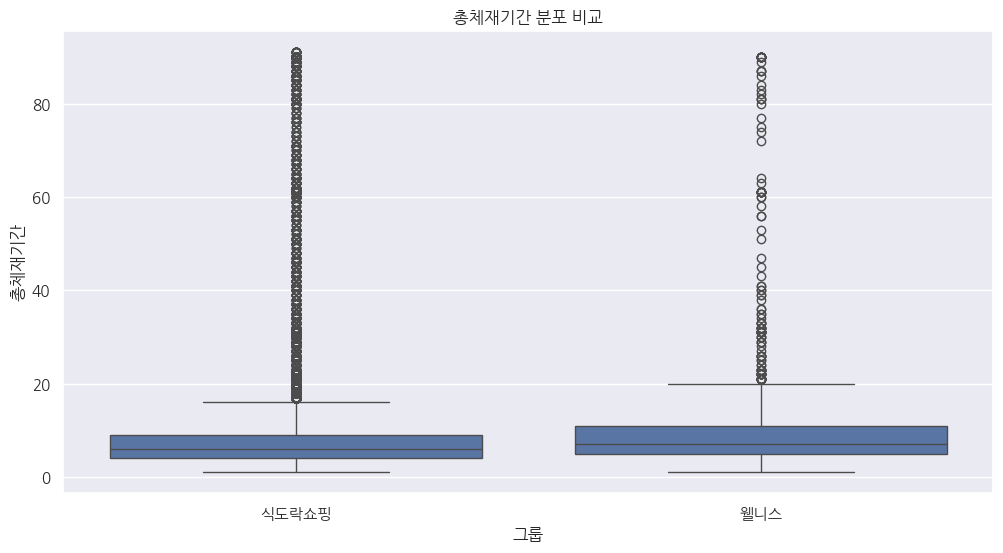

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# '웰니스' 참여 여부 기준으로 그룹 컬럼 만들기 (예시)
data['그룹'] = '기타'  # 기본값 할당

# 웰니스 관광요소 하나라도 참여한 사람: '웰니스'
wellness_condition = (
    (data['참여_자연경관감상_이진'] == 1) |
    (data['참여_휴양휴식웰니스_이진'] == 1) |
    (data['참여_치료건강검진_이진'] == 1) |
    (data['참여_뷰티미용관광_이진'] == 1)
)
data.loc[wellness_condition, '그룹'] = '웰니스'

# 식도락/쇼핑 참여한 사람: '식도락쇼핑'
foodshopping_condition = (
    (data['참여_쇼핑_이진'] == 1) |
    (data['참여_식도락관광_이진'] == 1)
)
data.loc[foodshopping_condition, '그룹'] = '식도락쇼핑'

# 웰니스와 식도락쇼핑 둘 다 포함된 경우도 있을 수 있으니
# 필요하면 구분 조건을 추가 조정하세요.

# 이제 시각화
sns.boxplot(x='그룹', y='총체재기간', data=data[data['그룹'].isin(['웰니스', '식도락쇼핑'])])
plt.title('총체재기간 분포 비교')
plt.show()

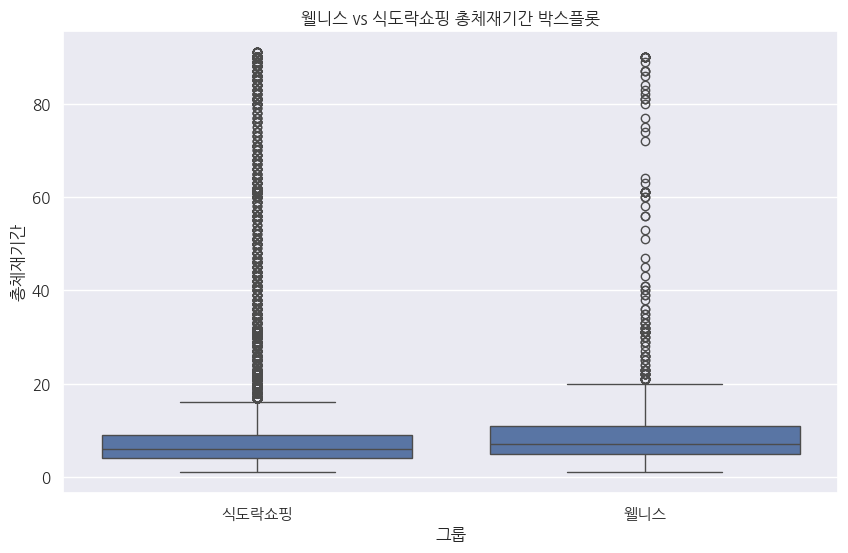

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='그룹', y='총체재기간', data=data[data['그룹'].isin(['웰니스', '식도락쇼핑'])])
plt.title('웰니스 vs 식도락쇼핑 총체재기간 박스플롯')
plt.show()

In [33]:
# 그룹별로 총체재기간에 대한 기술통계 확인
summary = data[data['그룹'].isin(['웰니스', '식도락쇼핑'])].groupby('그룹')['총체재기간'].describe()
print(summary)

         count       mean        std  min  25%  50%   75%   max
그룹                                                             
식도락쇼핑  29152.0  10.022434  13.486520  1.0  4.0  6.0   9.0  91.0
웰니스     1286.0  11.148523  14.238017  1.0  5.0  7.0  11.0  90.0


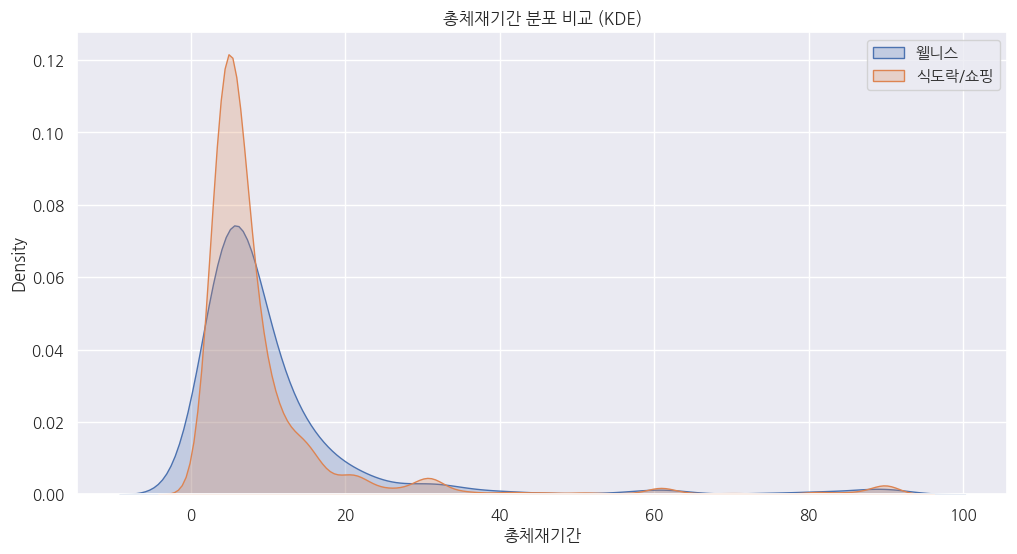

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.kdeplot(data=data[data['그룹']=='웰니스'], x='총체재기간', label='웰니스', fill=True)
sns.kdeplot(data=data[data['그룹']=='식도락쇼핑'], x='총체재기간', label='식도락/쇼핑', fill=True)
plt.title('총체재기간 분포 비교 (KDE)')
plt.legend()
plt.show()